In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
from scipy.stats import skewnorm
sns.set_style("whitegrid")

In [2]:
np.random.seed(1530)

size = 1000

x1 = np.random.normal(loc=40, scale = 2, size= int(size/2))
x2 = np.random.normal(loc= 69, scale= 2, size=int(size/2))

bi_modal = np.concatenate([x1, x2])

x1 = np.random.normal(loc=40, scale=4, size=int(size/4))
x2 = np.random.normal(loc= 69, scale=4, size=int(size/4))
x3 = np.random.normal(loc=0, scale=2, size=int(size/4))
x4 = np.random.normal(loc=80, scale=2, size=int(size/4))

multi_modal= np.concatenate([x1, x2, x3, x4])

df = pd.DataFrame(data={
    "Normal": np.random.normal(loc=0, scale=2, size= size),
    "Positive skewed": skewnorm.rvs(a=10, size=size),
    "Negative skewed": skewnorm.rvs(a=-10, size=size),
    "Exponential": np.random.exponential(scale=20, size=size),
    "Uniform": np.random.uniform(low=0.0, high=1.0, size=size),
    "Bimodal": bi_modal,
    "Multimodal": multi_modal,
    "Poisson": np.random.poisson(lam=1.0, size=size),
    "Discrete": np.random.choice([10, 12, 14, 16, 17, 20, 69], size=size)
}).round(3)

df.head()

,Normal,Positive skewed,Negative skewed,Exponential,Uniform,Bimodal,Multimodal,Poisson,Discrete
0,-3.308,1.390,-1.441,22.500,0.395,42.250,38.503,0,20
1,0.695,0.199,-0.915,17.577,0.165,34.392,47.095,1,14
2,-0.592,0.353,-0.420,16.179,0.910,38.285,40.785,1,17
3,2.363,0.334,-1.644,17.131,0.500,38.806,32.635,0,14
4,2.562,0.914,-0.392,2.974,0.849,40.623,39.815,0,16


In [4]:
df["NormalStd_1"] = np.random.normal(loc=0, scale=1, size=size)
df["NormalStd_5"] = np.random.normal(loc=0, scale=5, size=size)
df["NormalStd_10"] = np.random.normal(loc=0, scale=10, size=size)
df

,Normal,Positive skewed,Negative skewed,Exponential,Uniform,Bimodal,Multimodal,Poisson,Discrete,NormalStd_1,NormalStd_5,NormalStd_10
0,-3.308,1.390,-1.441,22.500,0.395,42.250,38.503,0,20,-2.259205,-5.780823,-1.031631
1,0.695,0.199,-0.915,17.577,0.165,34.392,47.095,1,14,-0.593462,-2.721360,-5.508335
2,-0.592,0.353,-0.420,16.179,0.910,38.285,40.785,1,17,1.281514,12.185480,5.744263
3,2.363,0.334,-1.644,17.131,0.500,38.806,32.635,0,14,-1.589870,-0.517050,-3.516386
4,2.562,0.914,-0.392,2.974,0.849,40.623,39.815,0,16,-0.198089,-0.258643,-2.865623
...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.983,0.465,-0.472,50.814,0.929,65.235,77.509,1,17,1.014694,-3.735892,1.015968
996,-3.297,0.405,-0.493,7.302,0.586,70.657,80.993,1,17,1.261023,2.230734,0.622440
997,-0.899,2.078,-0.504,3.279,0.776,67.659,81.432,0,20,0.388601,4.927745,6.424618
998,1.250,0.425,-0.163,17.312,1.000,65.772,84.078,1,69,-0.939619,-7.127836,-3.111049


In [7]:
df.var().round(3)

Normal               3.725
Positive skewed      0.365
Negative skewed      0.358
Exponential        529.036
Uniform              0.084
Bimodal            214.757
Multimodal         966.920
Poisson              1.016
Discrete           408.551
NormalStd_1          1.016
NormalStd_5         27.170
NormalStd_10        98.208
dtype: float64

In [8]:
df.std()

Normal              1.930000
Positive skewed     0.604063
Negative skewed     0.598479
Exponential        23.000792
Uniform             0.290199
Bimodal            14.654587
Multimodal         31.095330
Poisson             1.007936
Discrete           20.212653
NormalStd_1         1.007846
NormalStd_5         5.212524
NormalStd_10        9.910015
dtype: float64

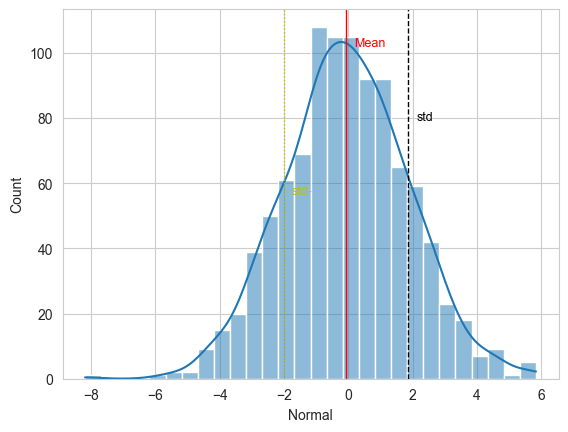

In [9]:
col = "Normal"

fig, axes= plt.subplots()
sns.histplot(data=df, x=col, kde=True)

plt.axvline(df[col].mean(), color="r", linestyle="-", linewidth=1)
plt.text(df[col].mean() + df[col].std()/8, y=axes.get_ylim()[1]*0.90, s="Mean",
         fontsize=9, color="r")

plt.axvline(df[col].mean() + df[col].std(), color="k", linestyle="--", linewidth=1)
plt.text(df[col].mean() + df[col].std() + df[col].std()/8, 
         y=axes.get_ylim()[1]*0.70, s="std", fontsize=9, color="k")

plt.axvline(df[col].mean() - df[col].std(), color="y", linestyle=":", linewidth=1)
plt.text(df[col].mean() - df[col].std() + df[col].std()/8, 
         y=axes.get_ylim()[1]*0.50, s="std-", fontsize=9, color="y")

plt.show()

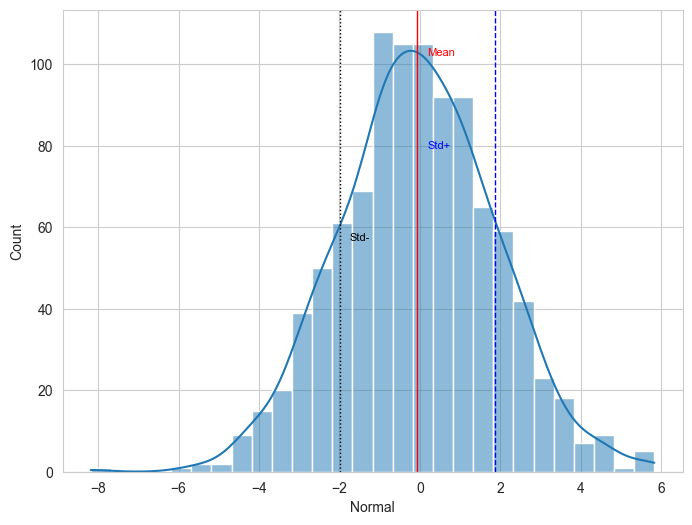

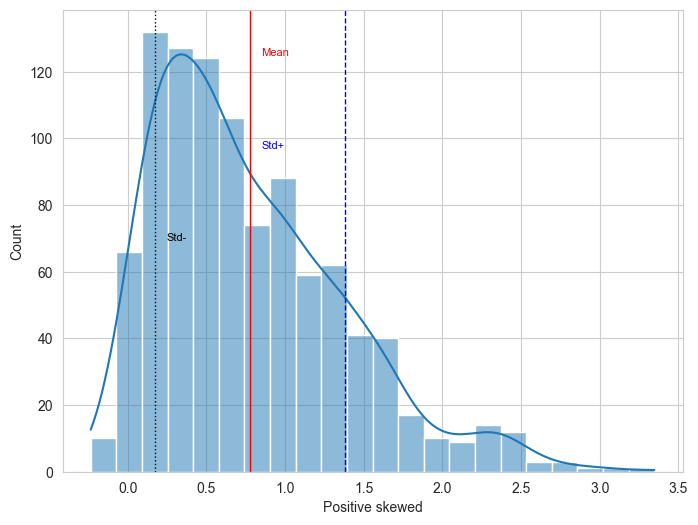

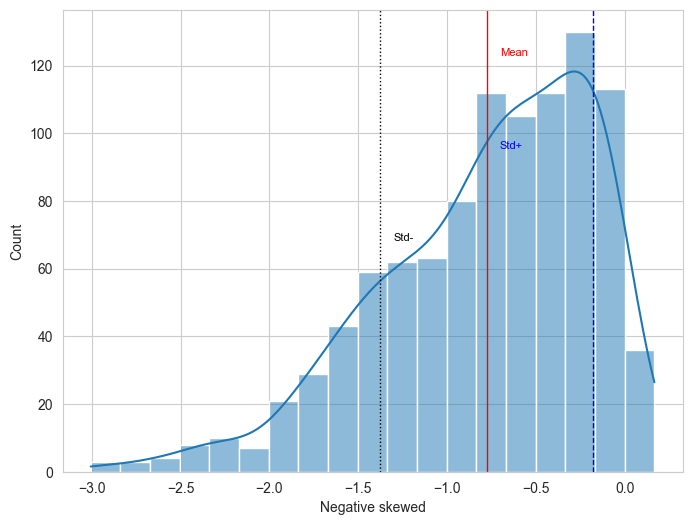

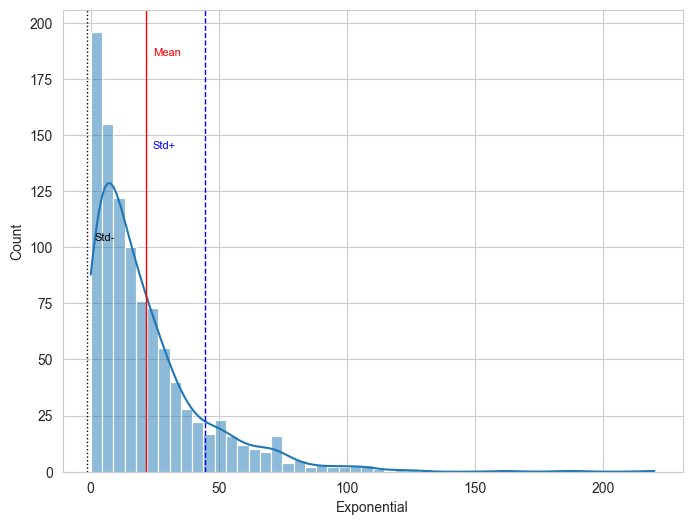

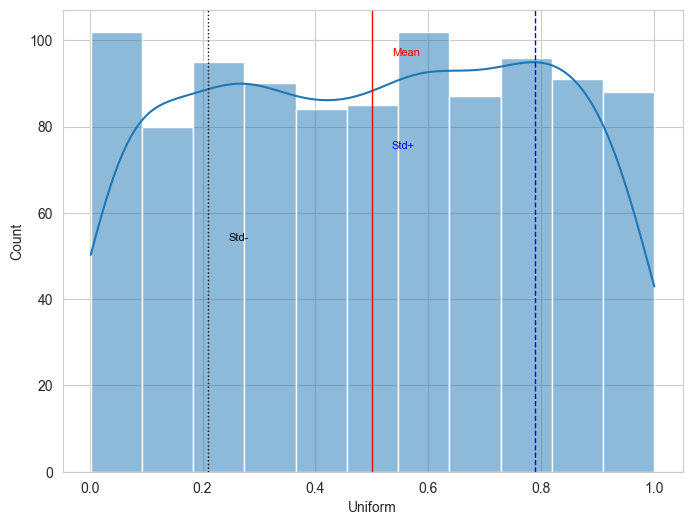

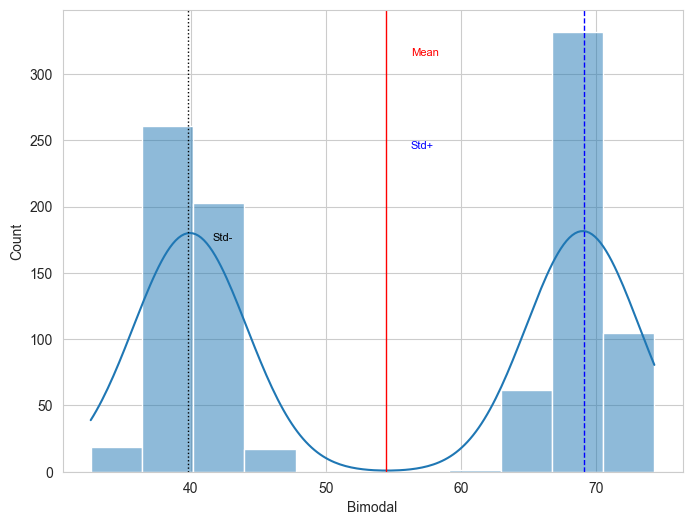

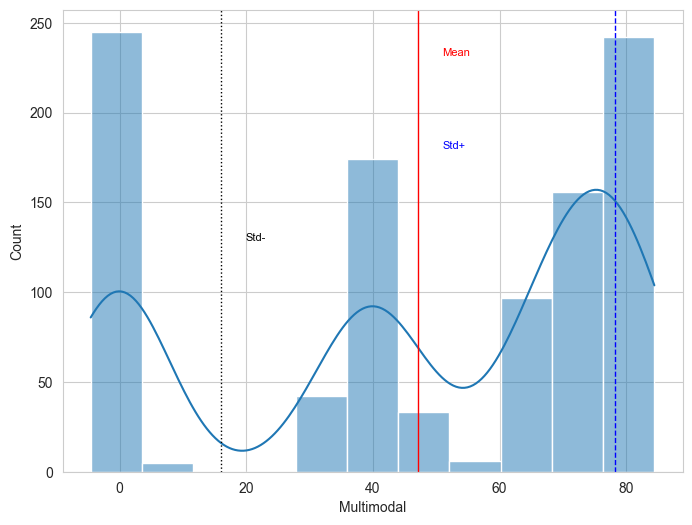

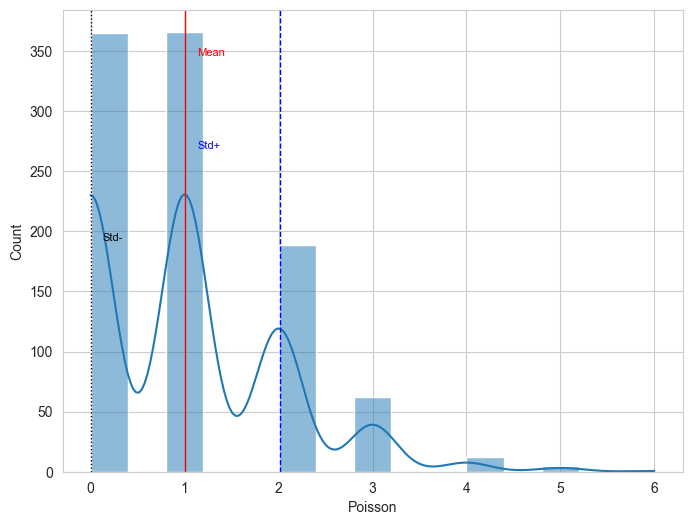

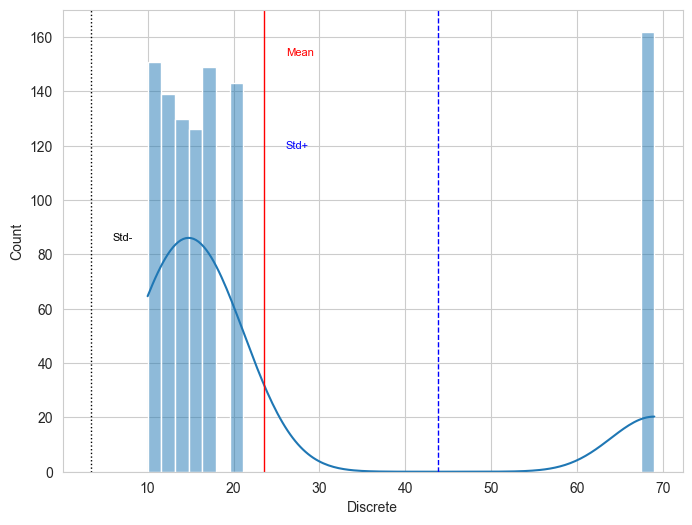

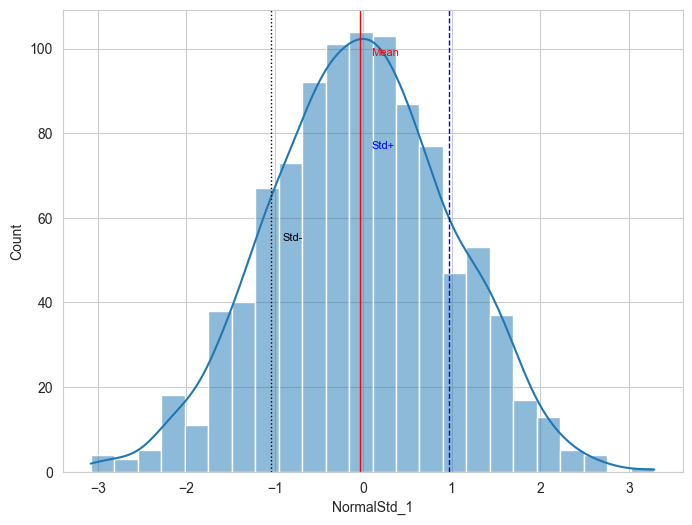

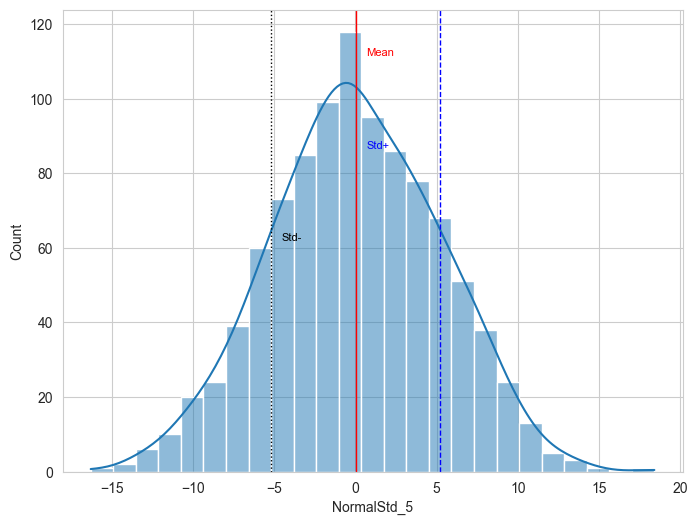

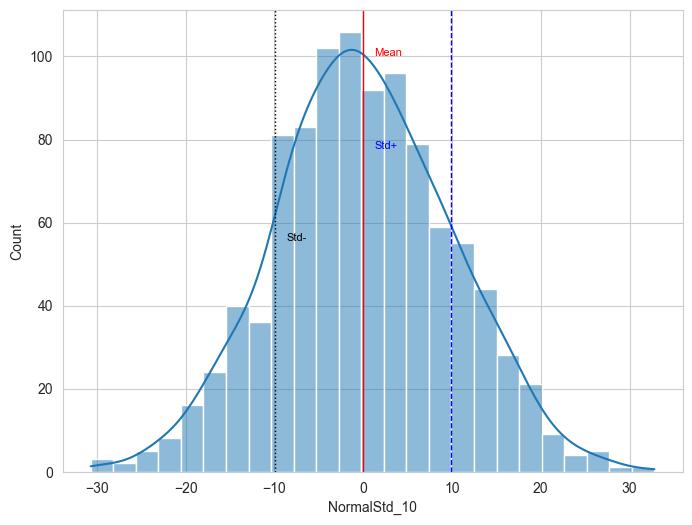

In [15]:
for col1 in df.columns:
    fig, axes = plt.subplots(figsize=(8, 6))
    sns.histplot(data=df, x=col1, kde=True)

    plt.axvline(df[col1].mean(), linestyle="-", linewidth=1, c="r")
    plt.text(df[col1].mean() + df[col1].std()/8, y=axes.get_ylim()[1] * 0.90, 
             s="Mean", c="r", fontsize=8)
    
    plt.axvline(df[col1].mean() + df[col1].std(), linestyle="--", linewidth=1, c="b")
    plt.text(df[col1].mean() + df[col1].std()/8, y=axes.get_ylim()[1] * 0.70, 
             s="Std+", c="b", fontsize=8)
    

    plt.axvline(df[col1].mean() - df[col1].std(), linestyle=":", linewidth=1, c="k")
    plt.text(df[col1].mean() - df[col1].std() + df[col1].std()/8, 
             y=axes.get_ylim()[1] * 0.50, s="Std-", c="k", fontsize=8)
    


    plt.show()



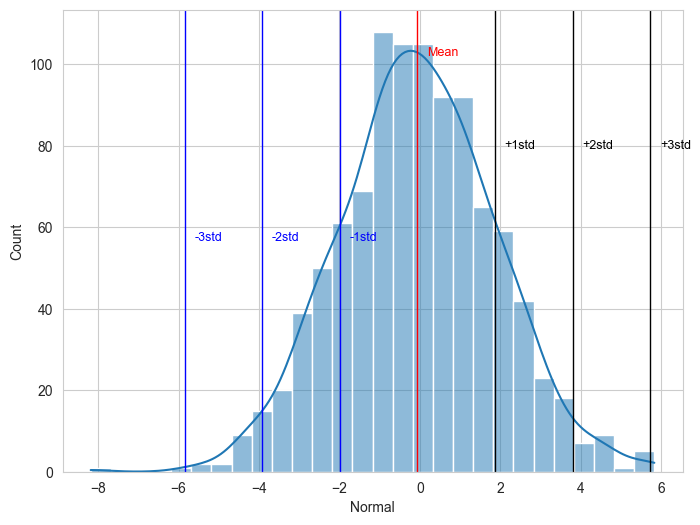

In [21]:
col = "Normal"

fig, axes= plt.subplots(figsize=(8, 6))
sns.histplot(data=df, x=col, kde=True)

plt.axvline(df[col].mean(), color="r", linestyle="-", linewidth=1)
plt.text(df[col].mean() + df[col].std()/8, y=axes.get_ylim()[1]*0.90, s="Mean",
         fontsize=9, color="r")

for num in [1, 2, 3]:
    plt.axvline(df[col].mean() + num *df[col].std(), color="k", linestyle="-", 
                linewidth=1)    
    plt.text(df[col].mean() + num *df[col].std() + df[col].std()/8, s=f"+{num}std", 
                y=axes.get_ylim()[1] * 0.70, fontsize=9, c="k")
    
    plt.axvline(df[col].mean() - num *df[col].std(), color="b", linestyle="-", 
                linewidth=1)    
    plt.text(df[col].mean() - num *df[col].std() + df[col].std()/8, s=f"-{num}std", 
                y=axes.get_ylim()[1] * 0.50, fontsize=9, c="b")
    
plt.show()
